In [2]:
## Reading and understanding the data

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd


In [6]:
bike_share=pd.read_csv('/Users/shekher.r/upgrade/python/Juune-ML53/ML/multiple_regression/BikeSharing_assignment/day.csv')

In [7]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_share.shape

(730, 16)

In [9]:
bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
## convert 'weathersit' and 'season'  in string categorical values

def season_map(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

#bike_share['season']=bike_share['season'].astype('str')
bike_share[['season']]=bike_share[['season']].apply(season_map)


In [12]:
bike_share['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
## convert 'weathersit' and 'season'  in string categorical values
def weathersit_map(x):
    return x.map({1:'clear',2:'mistCloud',3:'lightRain',4:'heavyRain'})
bike_share['weathersit']=bike_share[['weathersit']].apply(weathersit_map)

In [14]:
bike_share['weathersit'].value_counts()

clear        463
mistCloud    246
lightRain     21
Name: weathersit, dtype: int64

In [15]:
## removing repeated and unwanted column
#instant = we can remove index
#dteday=already cap
#casual & registered
bike_share_new=bike_share[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [16]:
# Convert season,weathersit,mnth,weekday to 'category' data type

bike_share_new['season']=bike_share_new['season'].astype('category')
bike_share_new['weathersit']=bike_share_new['weathersit'].astype('category')
bike_share_new['mnth']=bike_share_new['mnth'].astype('category')
bike_share_new['weekday']=bike_share_new['weekday'].astype('category')


In [17]:
bike_share_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [18]:
bike_share_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [19]:
## visualising the data
import matplotlib.pyplot as plt
import seaborn as sns


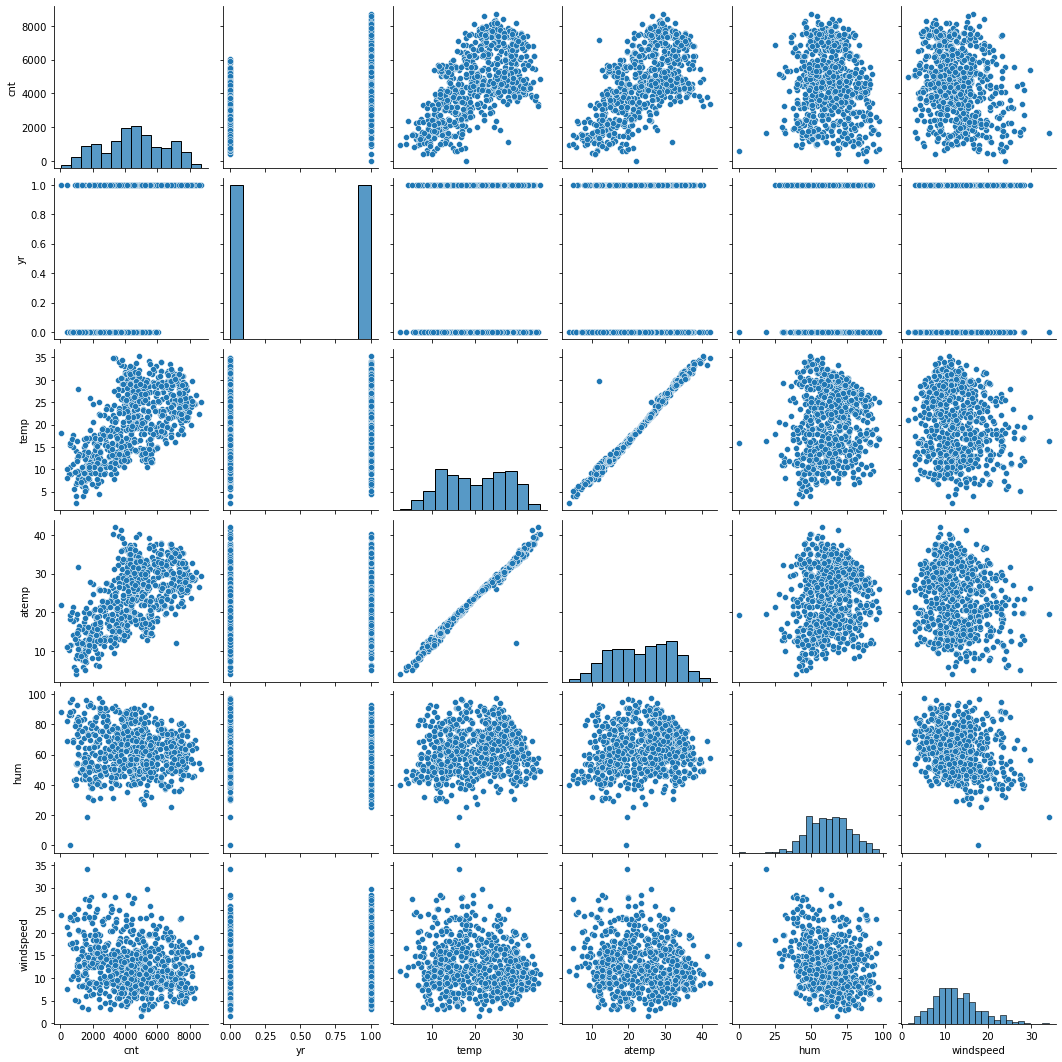

In [21]:
## visualising numeric values
sns.pairplot(bike_share_new[['cnt','yr','temp','atemp','hum','windspeed']])
plt.show()

In [ ]:
## from above pair plot its clear there is linear relationship between cnt,temp and atemp

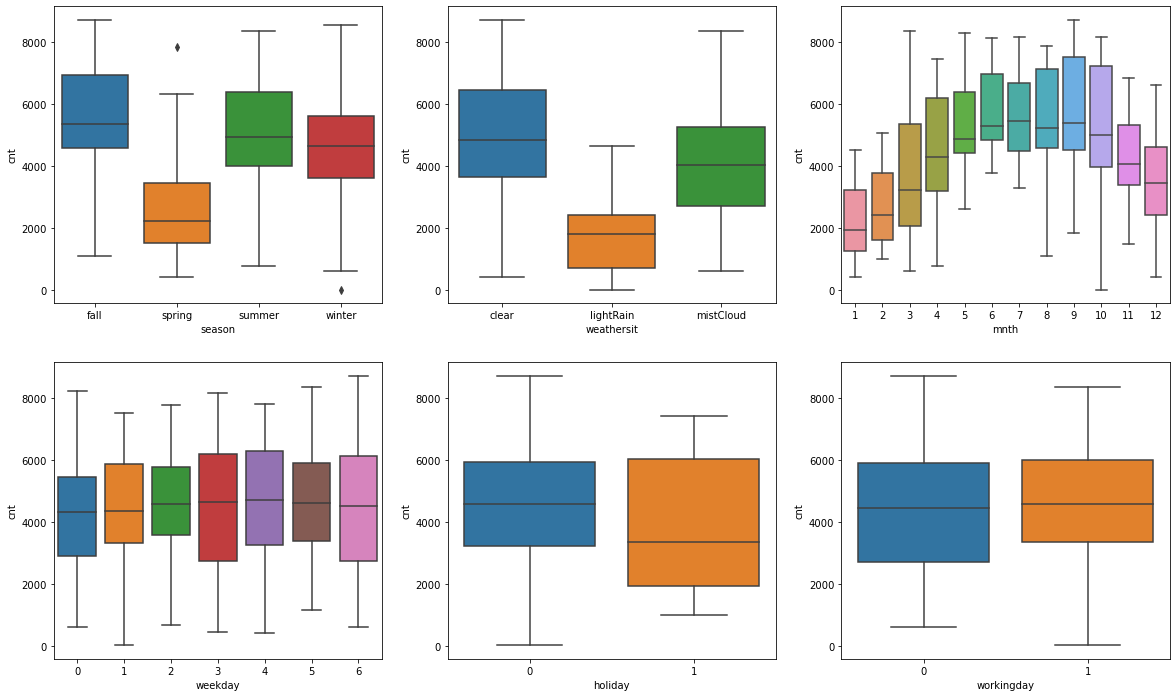

In [22]:
##visualising categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share_new)
plt.show()

In [23]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_share_new = pd.get_dummies(bike_share_new, drop_first=True)
bike_share_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_spring         730 non-null    uint8  
 9   season_summer         730 non-null    uint8  
 10  season_winter         730 non-null    uint8  
 11  mnth_2                730 non-null    uint8  
 12  mnth_3                730 non-null    uint8  
 13  mnth_4                730 non-null    uint8  
 14  mnth_5                730 non-null    uint8  
 15  mnth_6                7

In [25]:
bike_share_new.shape

(730, 30)

In [26]:
bike_share_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightRain,weathersit_mistCloud
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
### split the data into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_share_new, train_size = 0.7, test_size = 0.3, random_state = 333)

In [56]:
df_train.shape

(510, 30)

In [57]:
df_test.shape

(219, 30)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
## rescaling the features using Min - Max

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightRain,weathersit_mistCloud
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightRain,weathersit_mistCloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.025490,0.341176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


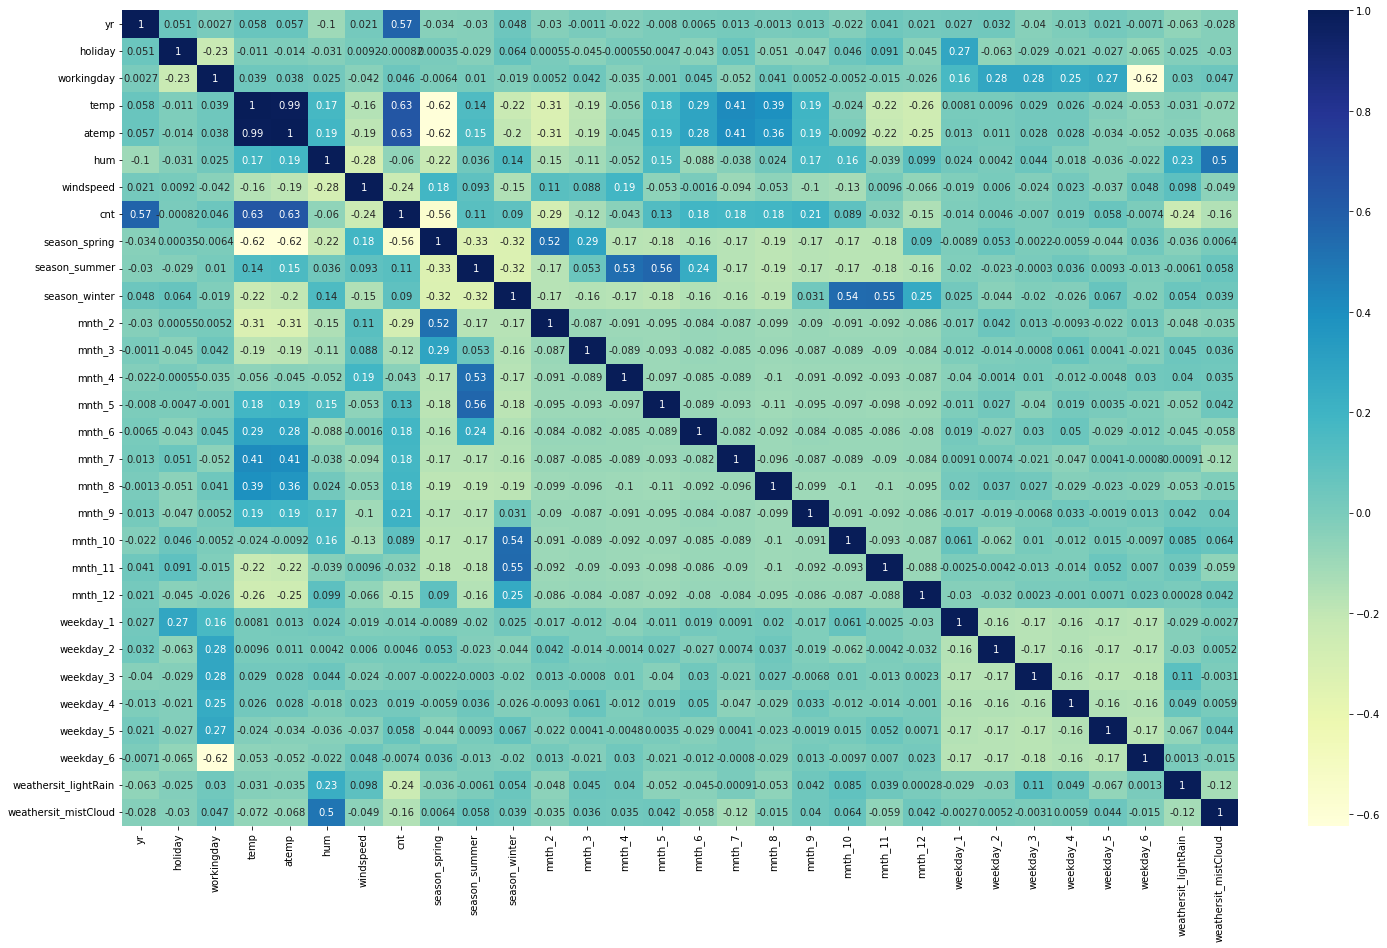

In [61]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [62]:
### Dividing into x and y set for model building
y_train = df_train.pop('cnt')
X_train = df_train


In [63]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 4),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_lightRain', True, 1),
 ('weathersit_mistCloud', True, 1)]

In [66]:
col = X_train.columns[rfe.support_]
col


Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_5', 'mnth_9',
       'mnth_10', 'weekday_6', 'weathersit_lightRain', 'weathersit_mistCloud'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]


Index(['holiday', 'season_summer', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')